In [1]:
import random
import ciw
import math
import pandas as pd

# Example A: Fridge Magnets

In [2]:
def run_experiment(fridge_magnets):
    first_two = random.sample(fridge_magnets, 2)
    one_is_vowel = any(letter in "AEIOU" for letter in first_two)
    return one_is_vowel

In [3]:
fridge_magnets = ["H", "E", "L", "L", "O", "W", "O", "R", "L", "D"]

In [4]:
random.seed(5)
run_experiment(fridge_magnets)

True

In [5]:
run_experiment(fridge_magnets)

False

In [6]:
def run_experiments(num_experiments, fridge_magnets):
    successes = []
    random.seed(0)
    for trial in range(num_experiments):
        outcome = run_experiment(fridge_magnets)
        successes.append(outcome)
    prob_of_success = sum(successes) / num_experiments
    return prob_of_success

In [7]:
run_experiments(num_experiments=10, fridge_magnets=fridge_magnets)

0.5

In [8]:
run_experiments(num_experiments=50000, fridge_magnets=fridge_magnets)

0.5326

# Task 1: Weight of Shopping Bag

In [9]:
def choose_type_of_fruit():
    if random.random() < 0.4:
        return "Apple"
    return "Melon"

In [10]:
def fill_shopping_bag():
    fruit = choose_type_of_fruit()
    number = random.choice([1, 2, 3, 4, 5, 6])
    bag_weight = 0
    if fruit == "Apple":
        for apple in range(number):
            bag_weight += random.uniform(70, 100)
    if fruit == "Melon":
        for melon in range(number):
            bag_weight += random.normalvariate(1200, 250)
    return bag_weight

In [11]:
random.seed(0)
fill_shopping_bag()

4071.3242946541422

In [12]:
def run_experiments(num_experiments):
    outcomes = []
    random.seed(0)
    for experiment in range(num_experiments):
        outcomes.append(fill_shopping_bag())
    return outcomes

1.	What is the expected weight of the shopping bag?

In [13]:
bags = run_experiments(num_experiments=50000)
expected_bag_weight = sum(bags) / len(bags)
expected_bag_weight

2625.1377470632874

2.	Explore the effect of the number of repetitions on the expected weight.

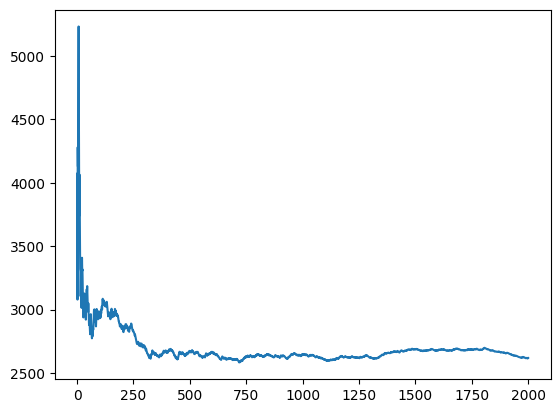

In [14]:
n_experiments = range(1, 2001)
expected_weights = [sum(run_experiments(num_experiments=n)) / n for n in n_experiments]

import matplotlib.pyplot as plt
plt.plot(n_experiments, expected_weights);

3.	What is the probability of the bag exceeding 6kg?

In [15]:
prob_over_6kg = sum(b > 6000 for b in bags) / len(bags)
prob_over_6kg

0.14796

4.	What does its weight distribution of the bag look like?

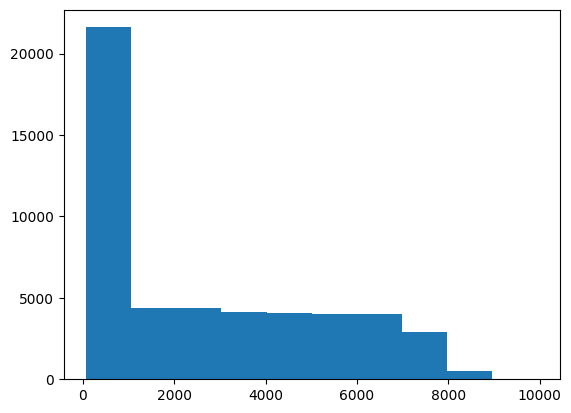

In [16]:
plt.hist(bags);

# Example B: Evaluating an Integral

$$
I = \int_3^{11} \left| \sin\left(\frac{x}{10}\right) \cos\left(2x\right) \right| \; dx
$$

In [17]:
def integrand(x):
    return abs(math.sin(x / 10) * math.cos(2 * x))

In [18]:
n_points = 100000
lower, upper = 3, 11
random.seed(0)
random_points = [(random.uniform(lower, upper), random.uniform(0, 1)) for point in range(n_points)]

In [19]:
under_curve = [point[1] <= integrand(point[0]) for point in random_points]

In [20]:
proportion_under_curve = sum(under_curve) / n_points
rectangle_area = (upper - lower)
estimated_value_of_integral = rectangle_area * proportion_under_curve
estimated_value_of_integral

3.21976

# Example C: M/M/1 Queue

In [21]:
N = ciw.create_network(
    arrival_distributions=[ciw.dists.Exponential(rate=11)],
    service_distributions=[ciw.dists.Exponential(rate=12)],
    number_of_servers=[1]
)

In [22]:
expected_waiting_times = []
for trial in range(10):
    ciw.seed(trial)
    Q = ciw.Simulation(N)
    Q.simulate_until_max_time(25)
    recs = Q.get_all_records()
    waiting_times = [r.waiting_time for r in recs if r.arrival_date > 1]
    expected_waiting_times.append(sum(waiting_times) / len(waiting_times))

1.	How long on average to staff spend waiting to play on the arcade machine?

In [23]:
(sum(expected_waiting_times) / len(expected_waiting_times)) * 60

29.854593255577754

2.	What will be the effect of investing in a second machine?

In [24]:
N = ciw.create_network(
    arrival_distributions=[ciw.dists.Exponential(rate=11)],
    service_distributions=[ciw.dists.Exponential(rate=12)],
    number_of_servers=[2]
)

expected_waiting_times = []
for trial in range(10):
    ciw.seed(trial)
    Q = ciw.Simulation(N)
    Q.simulate_until_max_time(25)
    recs = Q.get_all_records()
    waiting_times = [r.waiting_time for r in recs if r.arrival_date > 1]
    expected_waiting_times.append(sum(waiting_times) / len(waiting_times))

(sum(expected_waiting_times) / len(expected_waiting_times)) * 60

1.6164822273074855

# Task 2: M/G/c Queue

In [25]:
N = ciw.create_network(
    arrival_distributions=[ciw.dists.Exponential(rate=1/5)],
    service_distributions=[ciw.dists.Uniform(lower=5, upper=17)],
    number_of_servers=[3]
)

In [26]:
ciw.seed(1)
Q = ciw.Simulation(N)
Q.simulate_until_max_time(60 * 24 * 7)
recs = Q.get_all_records()
recs_df = pd.DataFrame(recs)
recs_df

,id_number,customer_class,original_customer_class,node,arrival_date,waiting_time,service_start_date,service_time,service_end_date,time_blocked,exit_date,destination,queue_size_at_arrival,queue_size_at_departure,server_id,record_type
0,1,Customer,Customer,1,0.721455,0.000000,0.721455,15.169205,15.890660,0.0,15.890660,-1,0,2,1,service
1,2,Customer,Customer,1,7.936300,0.000000,7.936300,8.060828,15.997128,0.0,15.997128,-1,1,1,2,service
2,3,Customer,Customer,1,11.356594,0.000000,11.356594,10.393893,21.750487,0.0,21.750487,-1,2,2,3,service
3,5,Customer,Customer,1,17.121318,0.000000,17.121318,5.340170,22.461488,0.0,22.461488,-1,2,1,2,service
4,4,Customer,Customer,1,16.628513,0.000000,16.628513,14.464680,31.093193,0.0,31.093193,-1,1,1,1,service
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,1996,Customer,Customer,1,10038.037719,1.015544,10039.053264,8.592407,10047.645671,0.0,10047.645671,-1,3,1,2,service
1995,1995,Customer,Customer,1,10029.265700,6.402649,10035.668349,16.829711,10052.498060,0.0,10052.498060,-1,3,0,3,service
1996,1997,Customer,Customer,1,10058.461058,0.000000,10058.461058,6.205299,10064.666357,0.0,10064.666357,-1,0,0,1,service
1997,1998,Customer,Customer,1,10065.681595,0.000000,10065.681595,10.280532,10075.962127,0.0,10075.962127,-1,0,1,1,service


1.	On average how long do customers wait?

In [27]:
recs_df['waiting_time'].mean()

5.213047002999628

2.	How many customers wait over 10 minutes?

In [28]:
(recs_df['waiting_time'] > 10).mean() * 100

17.158579289644823

3.	How many customers wait over 1 minute?

In [29]:
(recs_df['waiting_time'] > 1).mean() * 100

50.07503751875938

# Example D: A network of queues

In [30]:
N = ciw.create_network(
    arrival_distributions=[ciw.dists.Exponential(rate=1), None],
    service_distributions=[ciw.dists.Deterministic(value=2.2), ciw.dists.Uniform(lower=5, upper=28)],
    number_of_servers=[3, 18],
    routing=[
        [0, 1],
        [0.05, 0]
    ]
)

In [31]:
average_waits_clinician = []
for trial in range(10):
    ciw.seed(trial)
    Q = ciw.Simulation(N)
    Q.simulate_until_max_time(25 * 60)
    recs = Q.get_all_records()
    recs = [r for r in recs if r.arrival_date > 60]
    waiting_times_clinician = [r.waiting_time for r in recs if r.node == 2]
    average_wait_clinician = sum(waiting_times_clinician) / len(waiting_times_clinician)
    average_waits_clinician.append(average_wait_clinician)

In [32]:
sum(average_waits_clinician) / 10

10.951320759475593

In [33]:
N = ciw.create_network(
    arrival_distributions=[ciw.dists.Exponential(rate=1), None],
    service_distributions=[ciw.dists.Deterministic(value=2.2), ciw.dists.Uniform(lower=5, upper=28)],
    number_of_servers=[3, 19],
    routing=[
        [0, 1],
        [0.05, 0]
    ]
)

average_waits_clinician = []
for trial in range(10):
    ciw.seed(trial)
    Q = ciw.Simulation(N)
    Q.simulate_until_max_time(25 * 60)
    recs = Q.get_all_records()
    recs = [r for r in recs if r.arrival_date > 60]
    waiting_times_clinician = [r.waiting_time for r in recs if r.node == 2]
    average_wait_clinician = sum(waiting_times_clinician) / len(waiting_times_clinician)
    average_waits_clinician.append(average_wait_clinician)

sum(average_waits_clinician) / 10

3.113905600586772

# Task 3: A Café

In [34]:
N = ciw.create_network(
    arrival_distributions=[ciw.dists.Exponential(rate=18/60),
                           ciw.dists.Exponential(rate=12/60),
                           None],
    service_distributions=[ciw.dists.Exponential(rate=1/1),
                           ciw.dists.Exponential(rate=1/2.5),
                           ciw.dists.Exponential(rate=1/2)],
    routing=[[0.0, 0.3, 0.7],
             [0.0, 0.0, 1.0],
             [0.0, 0.0, 0.0]],
    number_of_servers=[1, 2, 2]
)

In [35]:
Q = ciw.Simulation(N)
Q.simulate_until_max_time(60)
recs = Q.get_all_records()
recs_df = pd.DataFrame(recs)

1.	How many customers are served during a typical lunch hour?

In [36]:
len(recs_df[recs_df['node'] == 3])

33

2.	How long are customers expected to wait at each counter?

In [37]:
recs_df.groupby('node')['waiting_time'].mean()

node
1    0.175919
2    0.398693
3    0.454463
Name: waiting_time, dtype: float64

3.	How long are customers expected to be in the system before leaving with their food?

In [38]:
recs_df['time_at_node'] = recs_df['exit_date'] - recs_df['arrival_date']
recs_df.groupby('id_number')['time_at_node'].sum().mean()

4.816236996550473

4.	You are provided with one extra member of staff. Where should that member of staff be stationed (the cold food counter, the hot food counter, or the till) to have the greatest effect on the customers’ overall waiting times?

In [39]:
def get_overall_average_wait(c_cold, c_hot, c_till):
    N = ciw.create_network(
        arrival_distributions=[ciw.dists.Exponential(rate=18/60),
                               ciw.dists.Exponential(rate=12/60),
                               None],
        service_distributions=[ciw.dists.Exponential(rate=1/1),
                               ciw.dists.Exponential(rate=1/2.5),
                               ciw.dists.Exponential(rate=1/2)],
        routing=[[0.0, 0.3, 0.7],
                 [0.0, 0.0, 1.0],
                 [0.0, 0.0, 0.0]],
        number_of_servers=[c_cold, c_hot, c_till]
    )
    overall_waits = []
    for trial in range(10):
        Q = ciw.Simulation(N)
        Q.simulate_until_max_time(60)
        recs = Q.get_all_records()
        recs_df = pd.DataFrame(recs)
        overall_wait = recs_df.groupby('id_number')['waiting_time'].sum().mean()
        overall_waits.append(overall_wait)

    return sum(overall_waits) / len(overall_waits)

In [40]:
get_overall_average_wait(1, 2, 2)

1.0024151737247917

In [41]:
get_overall_average_wait(2, 2, 2)

0.2871316768290841

In [42]:
get_overall_average_wait(1, 3, 2)

0.7918299534589732

In [43]:
get_overall_average_wait(1, 2, 3)

0.7596138393634586

# Supplementary task 2

In [44]:
def is_in_circle(x, y):
    return ((x - 0.5) ** 2) + ((y - 0.5) ** 2) <= 0.25

In [45]:
n_points = 1000000
random.seed(0)
random_points = [(random.uniform(0, 1), random.uniform(0, 1)) for point in range(n_points)]

In [46]:
in_circle = [is_in_circle(x, y) for x, y in random_points]

In [47]:
estimated_area_of_circle = sum(in_circle) / n_points
estimated_value_of_pi = estimated_area_of_circle * 4
estimated_value_of_pi

3.141132

# Supplementary task 3

In [48]:
def take_step(x, y):
    direction = random.choice(['Left', 'Straight', 'Right'])
    if direction == 'Left':
        return x - 1, y
    if direction == 'Straight':
        return x, y + 1
    if direction == 'Right':
        return x + 1, y

In [49]:
def coords_after_n_steps(n, x_start, y_start):
    x, y = x_start, y_start
    for steps in range(n):
        x, y = take_step(x, y)
    return x, y

In [50]:
def distance_after_n_steps(n, x_start, y_start):
    x, y = coords_after_n_steps(n, x_start, y_start)
    distance = ((x - x_start) ** 2 + (y - y_start) ** 2) ** 0.5
    return distance

In [51]:
random.seed(0)
distances = [distance_after_n_steps(100, 0, 0) for trial in range(100)]

In [52]:
average_distance = sum(distances) / len(distances)
average_distance

34.41934645622376

In [53]:
variance_distances = sum([(d - average_distance) ** 2 for d in distances]) / len(distances)
variance_distances

23.968589526436503

# Supplementary task 4

In [54]:
def get_proportion_over_30m(c_inspection, c_repair):
    N = ciw.create_network(
        arrival_distributions=[ciw.dists.Exponential(1/4), None],
        service_distributions=[ciw.dists.Exponential(1/3), ciw.dists.Exponential(1/6)],
        number_of_servers=[c_inspection, c_repair],
        routing=[[0.0, 0.8], [0.0, 0.0]]
    )
    
    proportions_over_30m = []
    for trial in range(20):
        ciw.seed(trial)
        Q = ciw.Simulation(N)
        Q.simulate_until_max_time(24 * 60)
        recs = Q.get_all_records()
        recs_df = pd.DataFrame(recs)
        recs_df['time_at_node'] = recs_df['exit_date'] - recs_df['arrival_date']
        proportion_over_30_mins = (recs_df.groupby('id_number')['time_at_node'].sum() > 30).mean()
        proportions_over_30m.append(proportion_over_30_mins)
    
    return sum(proportions_over_30m) / len(proportions_over_30m)

In [55]:
get_proportion_over_30m(c_inspection=1, c_repair=2)

0.21981877898558388

In [56]:
get_proportion_over_30m(c_inspection=2, c_repair=2)

0.050478744365214934

In [57]:
get_proportion_over_30m(c_inspection=1, c_repair=3)

0.13241643404778866

# Supplementary task 5

In [58]:
N = ciw.create_network(
    arrival_distributions=[ciw.dists.Deterministic(value=4.0),
                           None,
                           None],
    service_distributions=[ciw.dists.Uniform(lower=3, upper=5),
                           ciw.dists.Uniform(lower=3, upper=5),
                           ciw.dists.Uniform(lower=3, upper=5)],
    routing=[[0.0, 1.0, 0.0],
             [0.0, 0.0, 1.0],
             [0.0, 0.0, 0.0]],
    number_of_servers=[1, 1, 1],
    queue_capacities=[3, 3, 3]
)

In [59]:
broken_stools = []
for trial in range(8):
    ciw.seed(trial)
    Q = ciw.Simulation(N)
    Q.simulate_until_max_time((60 * 60) + 600)
    recs = Q.get_all_records()
    num_broken = len([r for r in recs if r.record_type=="rejection" if r.arrival_date > 600])
    broken_stools.append(num_broken)

In [60]:
average_broken_stools_per_hour = sum(broken_stools) / len(broken_stools)
average_broken_stools_per_hour

7.25

In [61]:
cost_per_hour = average_broken_stools_per_hour * 10
cost_per_hour

72.5